# Census Income Project

#### About data-
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

#### fnlwgt column:-

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.


#### Problem defination- 
- " To determine whether a person makes over $50K a year."

- This is a classification problem.


###  Data Analysis

In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Census_Income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


FNLWGT -
- It shows the number of people in a row, who has :-
    - Same Origin
    - Race
    - Age
    - Sex
    
- Education_num :
    - The highest education in numeric form
    
- marital_status:
    - Married_civ_spouse means married to civilian spouse
    - Married_AF_spouse married to the Armed Forces
    - Married_spouse_absent married partner is living at a considerable distance from home

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Here we have int and strings, there are no null values as per now.

In [5]:
df.shape

(32560, 15)

In [6]:
df.count()

Age               32560
Workclass         32560
Fnlwgt            32560
Education         32560
Education_num     32560
Marital_status    32560
Occupation        32560
Relationship      32560
Race              32560
Sex               32560
Capital_gain      32560
Capital_loss      32560
Hours_per_week    32560
Native_country    32560
Income            32560
dtype: int64

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.describe(include=['O'])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


### Checking Null values

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

-  there might be special char i'll check later

# EDA

In [11]:
# displaying maximum number  of rows 
pd.set_option('display.max_rows', 100)

In [12]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    815
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
51    595
49    577
18    550
48    543
52    478
53    464
55    419
54    415
17    395
58    366
56    366
57    358
59    355
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: Age, dtype: int64

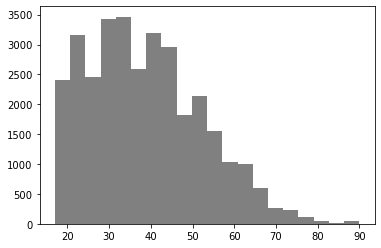

In [13]:
plt.hist(df['Age'],bins=20,histtype='stepfilled', color='grey')
plt.show()

The majority of people lies in between 30-40

In [14]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

The majority of citizens are warking in the private sector.
-  Theere is a ? in work class that is a special charecter,we will treat it as a null value.

In [15]:
#checking ? in data frame
df.isin([' ?']).sum(axis=0)

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

- Workclass
- Occupation
- Native_country
- Are the columns which have ? as special charecters.

In [16]:
df['Workclass']= df['Workclass'].replace(' ?',np.nan)

In [17]:
df['Occupation']= df['Occupation'].replace(' ?',np.nan)

In [18]:
df['Native_country']= df['Native_country'].replace(' ?',np.nan)

In [19]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [20]:
for column in ['Workclass', 'Occupation', 'Native_country']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [21]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Now there are no null values in the dataset.

In [22]:
# checking Work class
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

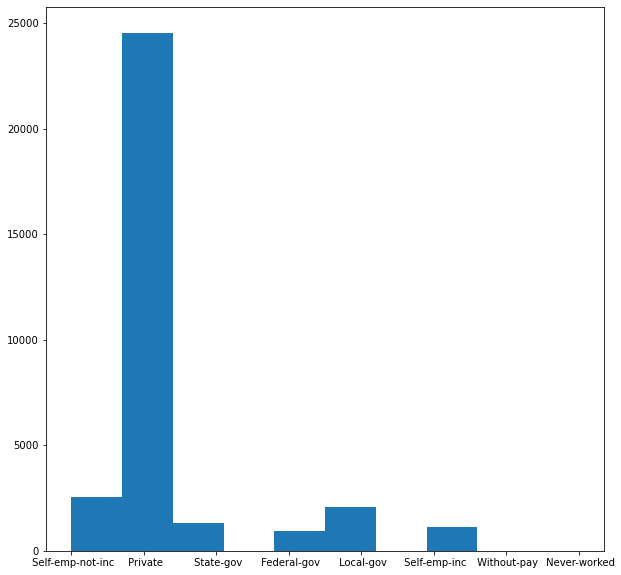

In [23]:
plt.figure(figsize=(10,10))
plt.hist(df['Workclass'],bins=10,histtype='stepfilled')
plt.show()

mostly employeed are in private sector, there are very few who never worked or are without pay.

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


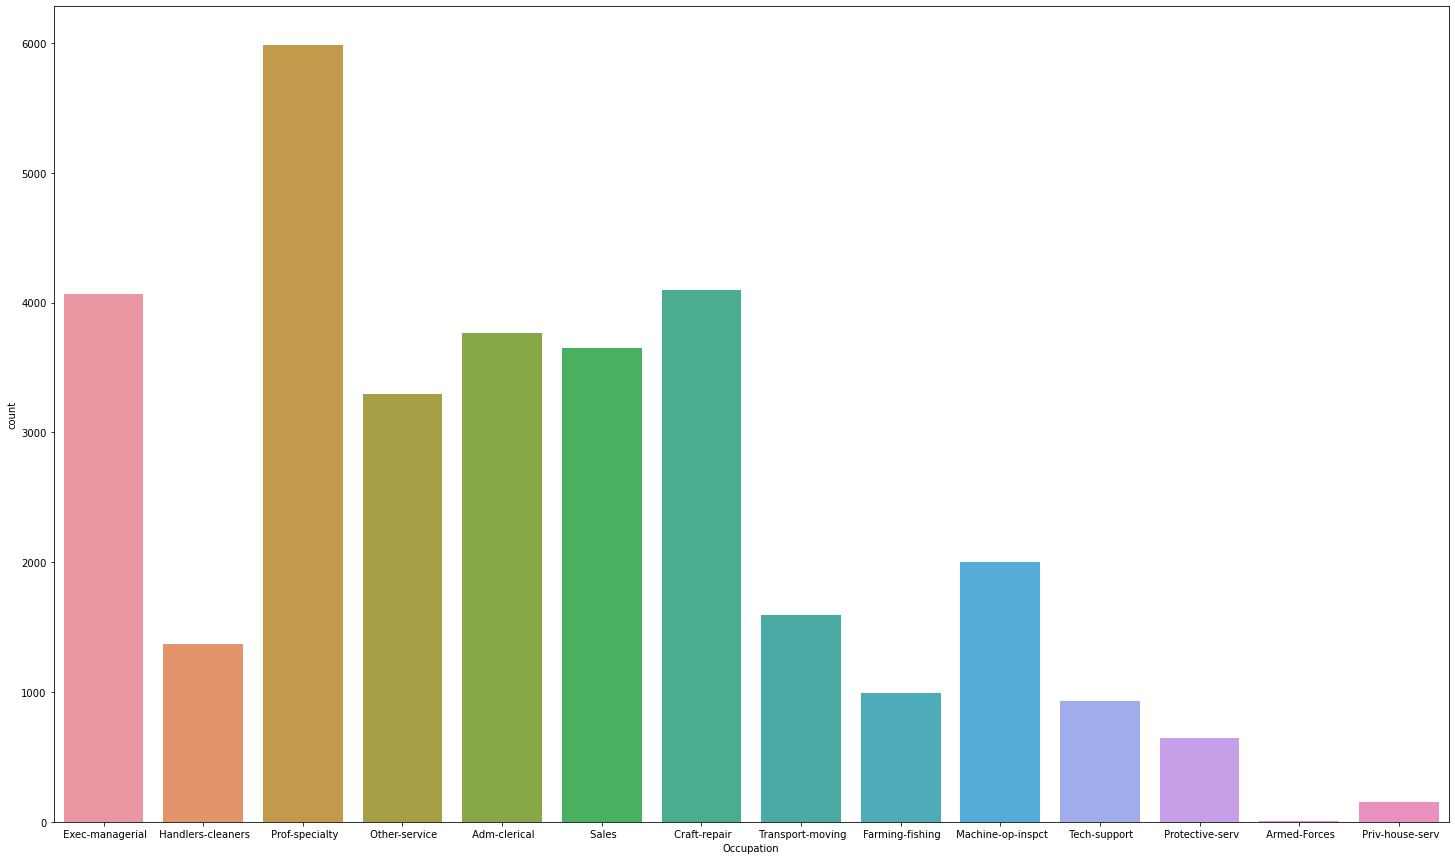

In [24]:
print(df['Occupation'].value_counts())  
plt.figure(figsize=(25,15))
sns.countplot(x='Occupation',data=df)
plt.show()

- There are most emplyes in Prof-specialty
- The least are in armed forces.

In [25]:
df['Education'].value_counts()    

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [26]:
df['Education_num'].value_counts()    

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

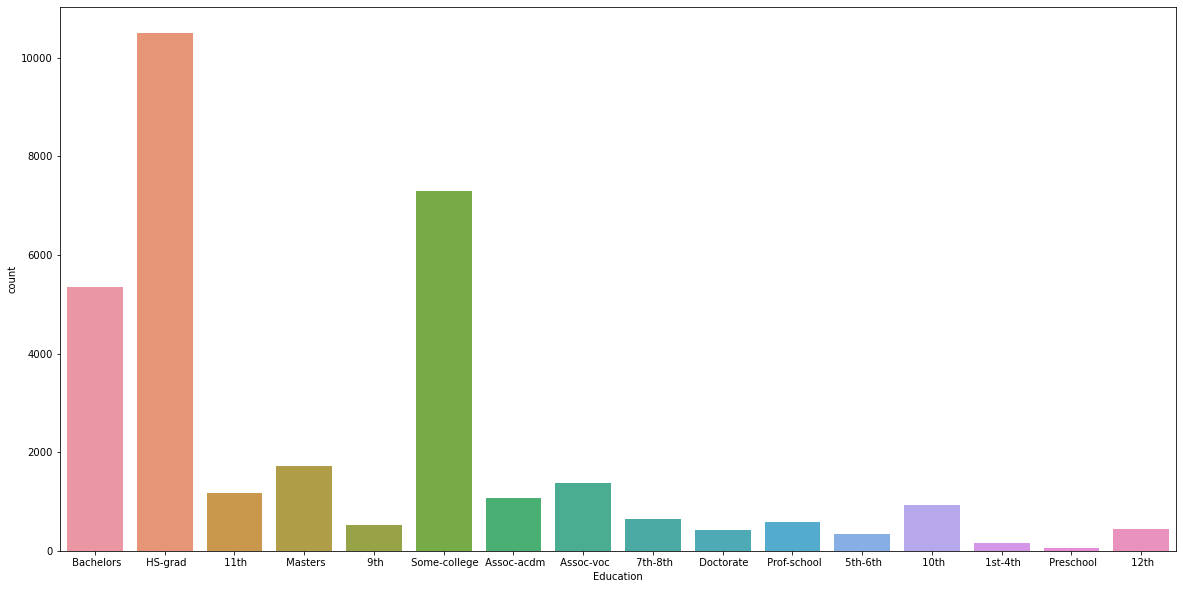

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x='Education',data=df)
plt.show()

- mostly the citizen are HS grad.
- then they attended some college
- then there are who have bachelors degree.

- there are very few citizens only with

 - 1st-4th
 - pre school

In [28]:
df['Marital_status'].value_counts()    

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

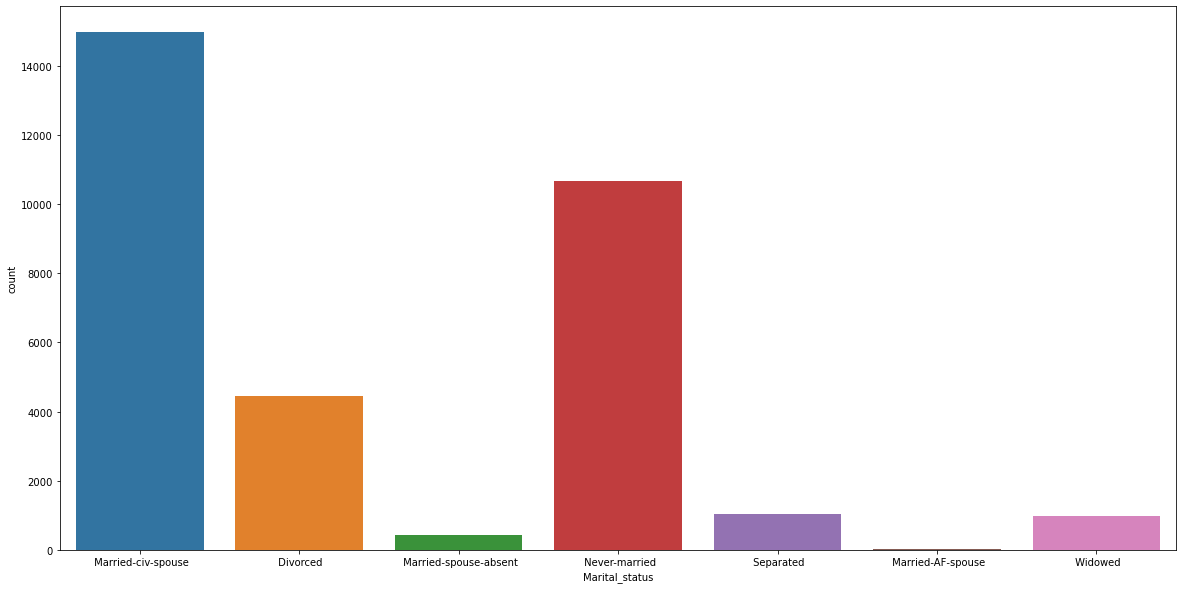

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x='Marital_status',data=df)
plt.show()

- The majority of citizens are married, and married to a civilian spouse
- Then there are who are unmarried
- 4443 citizens are divorced.
- there are only 26 citizens who's spouse are absent.

In [30]:
df['Relationship'].value_counts()    

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

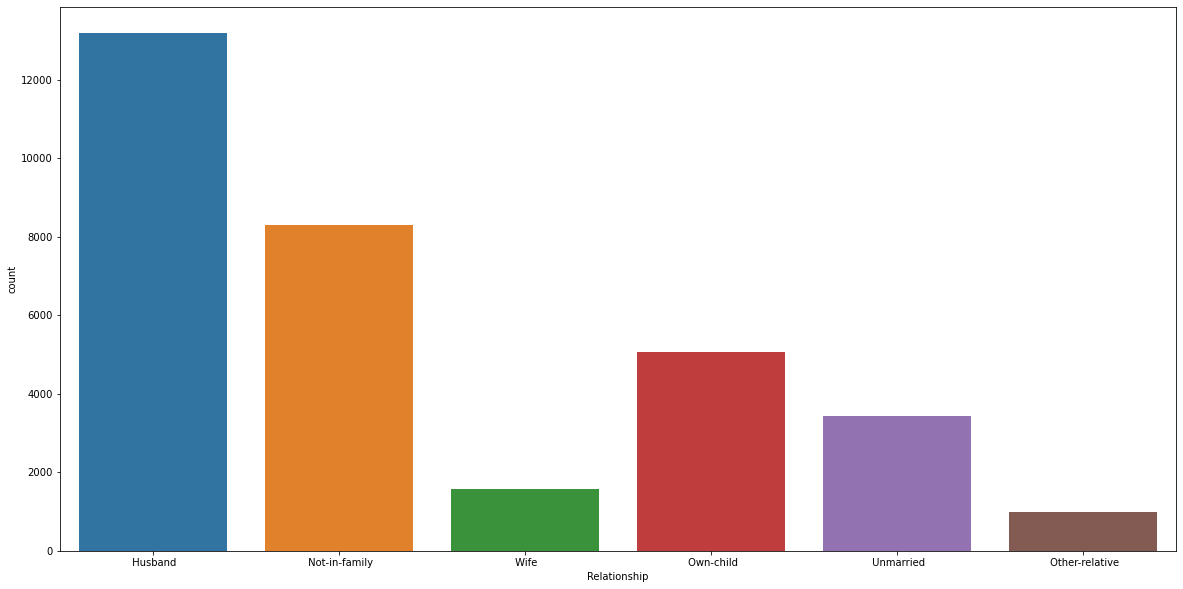

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='Relationship',data=df)
plt.show()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


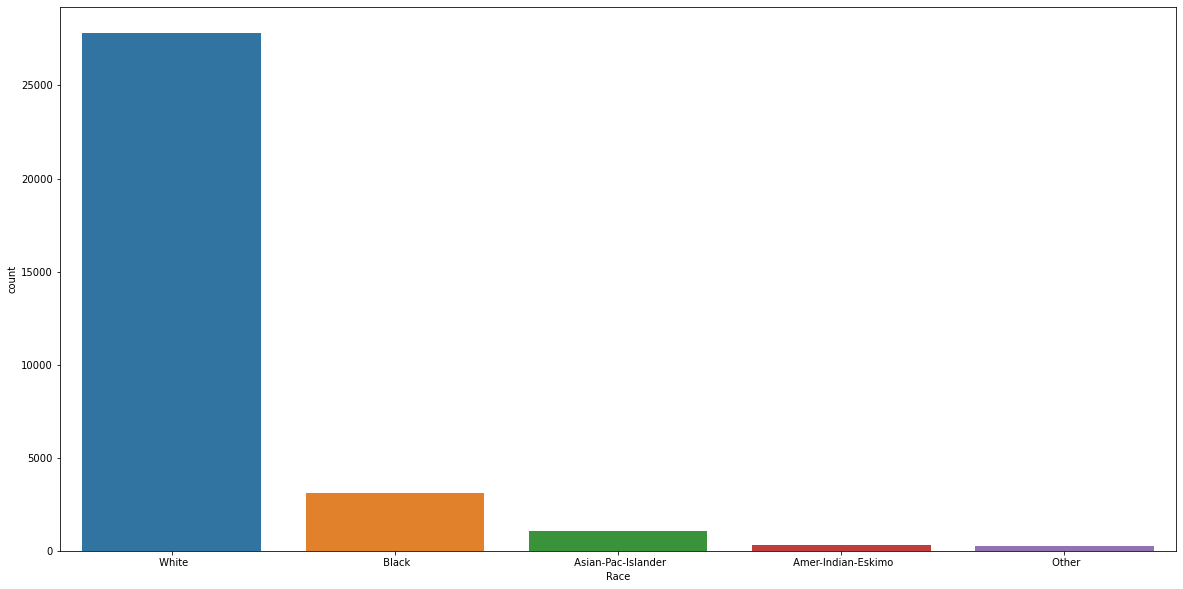

In [32]:
print(df['Race'].value_counts())  
plt.figure(figsize=(20,10))
sns.countplot(x='Race',data=df)
plt.show()

- There are majority of white in US leading after black

 Male      21789
 Female    10771
Name: Sex, dtype: int64


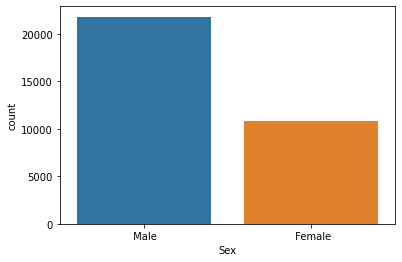

In [33]:
print(df['Sex'].value_counts())  
sns.countplot(x='Sex',data=df)
plt.show()

- There are more males in the country

In [34]:
print(df['Capital_gain'].value_counts())  

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64


In [35]:
print(df['Capital_loss'].value_counts())      

0       31041
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
1762       14
2444       12
2559       12
625        12
2824       10
2042        9
1617        9
2205        9
1651        9
2392        9
1594        8
1340        7
1380        7
1092        7
2174        7
1573        6
880         6
2246        6
2057        6
2206        6
2603        5
1668        4
1825        4
1258        4
2547        4
1726        4
213         4
2457        3
2129        3
653         3
2231        3
419         3
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735  

In [36]:
print(df['Hours_per_week'].value_counts())

40    15216
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
46       82
18       75
72       71
75       66
6        64
5        60
4        54
47       49
84       45
22       44
54       41
3        39
33       39
39       38
41       36
14       34
2        32
27       30
26       30
17       29
49       29
90       29
58       28
34       28
7        26
53       25
21       24
13       23
23       21
1        20
62       18
9        18
66       17
57       17
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89  

maximum number of citizens work for 40 hrs per week.


In [37]:
print(df['Native_country'].value_counts())     

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

- Apart from USA, citizens there are most from mexico and just 1 from Holand-Netherlands

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


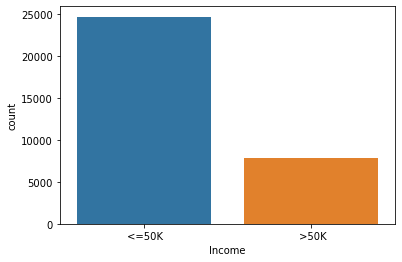

In [38]:
print(df['Income'].value_counts())     
sns.countplot(x='Income',data=df)
plt.show()

Since income is our target variable 

- I'm converting it ti int by alloting values
  - (<=50K) as 50000
  - (>50K) as 49999


- Then I'll be changing it datatype..

In [39]:
df['Income']= df['Income'].str.replace('<=50K','50000')

In [40]:
df['Income']= df['Income'].str.replace('>50K','49999')

In [41]:
df['Income'].value_counts()

 50000    24719
 49999     7841
Name: Income, dtype: int64

In [42]:
df['Income']=df['Income'].astype(str).astype(float)

In [43]:
df['Income'].dtypes

dtype('float64')

In [44]:
df.dtypes

Age                 int64
Workclass          object
Fnlwgt              int64
Education          object
Education_num       int64
Marital_status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country     object
Income            float64
dtype: object

### Bi-variate & Multi-variate analysis

In [45]:
df.dtypes

Age                 int64
Workclass          object
Fnlwgt              int64
Education          object
Education_num       int64
Marital_status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country     object
Income            float64
dtype: object

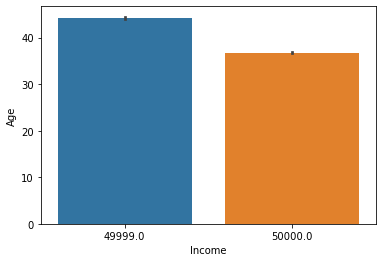

In [46]:
sns.barplot(x='Income',y="Age",data=df)

The income gradually increse with the Age.

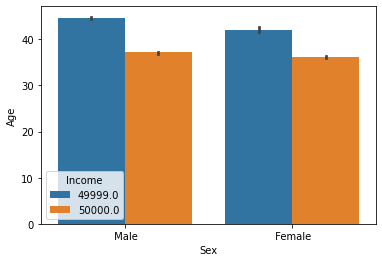

In [47]:
sns.barplot(x='Sex',y="Age",hue="Income",data=df)

There are more males who lie above those who earn below 50k

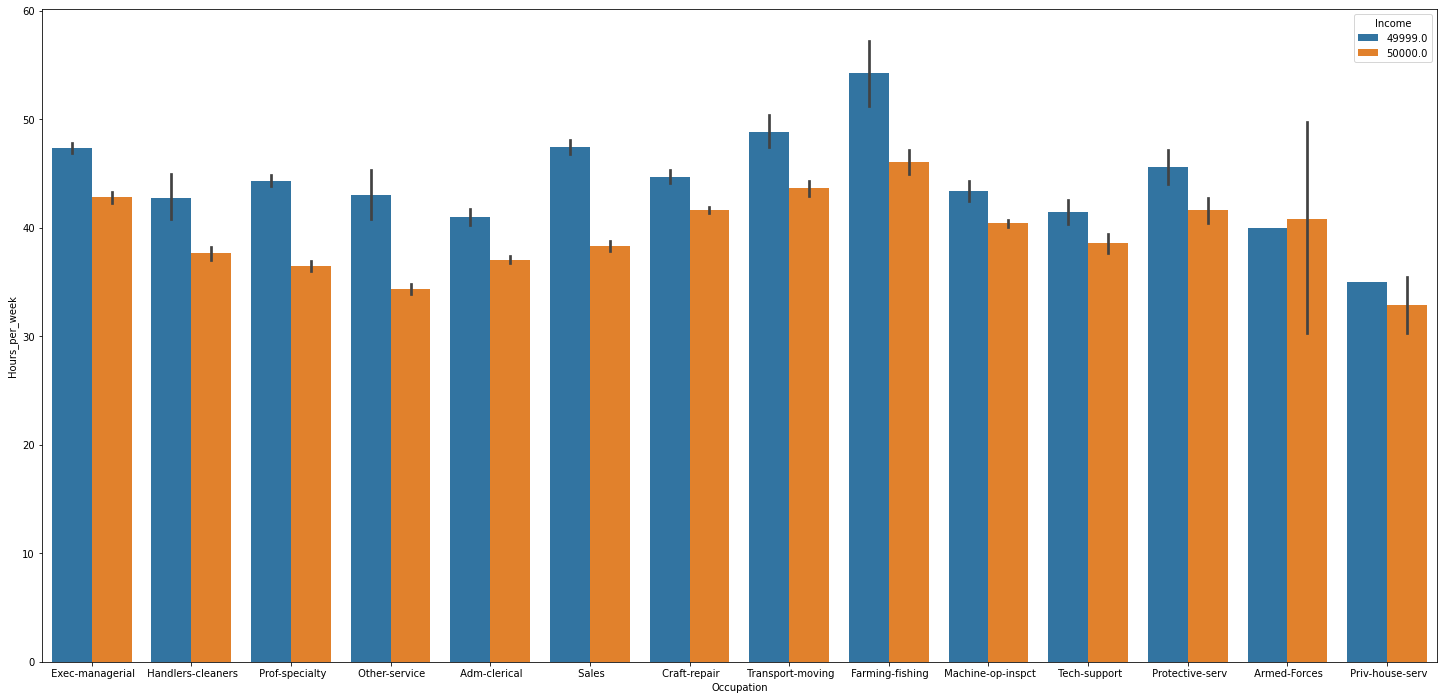

In [48]:
plt.figure(figsize=(25,12))
sns.barplot(x='Occupation',y="Hours_per_week",hue="Income",data=df)

- The most  income is generated from farming and fishing.
- Sales person's are getting after farming and fishing.
- Except armed forces every occupation has diffrence in there payscale.

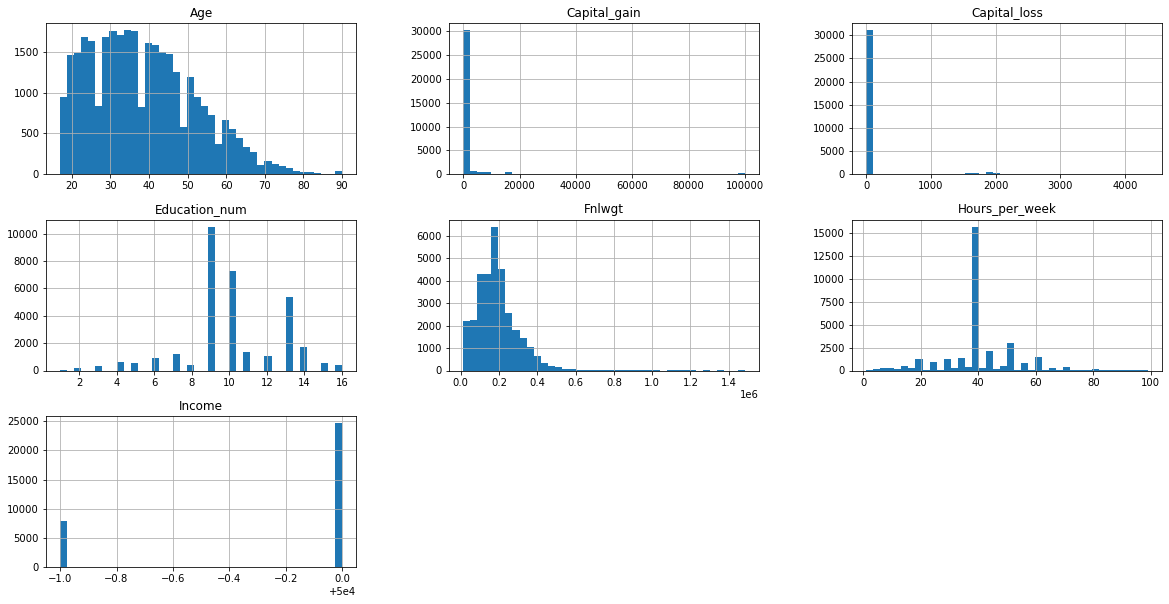

In [49]:
df.hist(figsize=(20,10), bins=40)
plt.show()

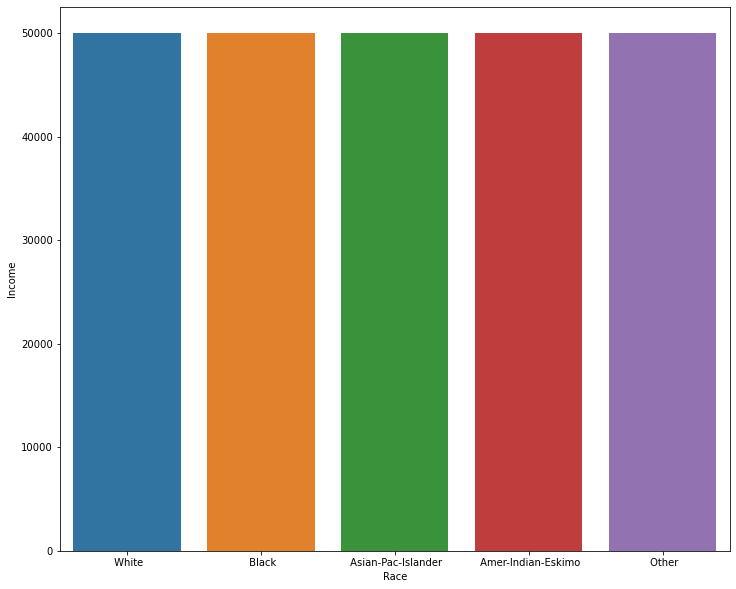

In [50]:
plt.figure(figsize=(12,10))
sns.barplot(x="Race", y = 'Income',data=df)
plt.show()

- There is impact of race in Income 

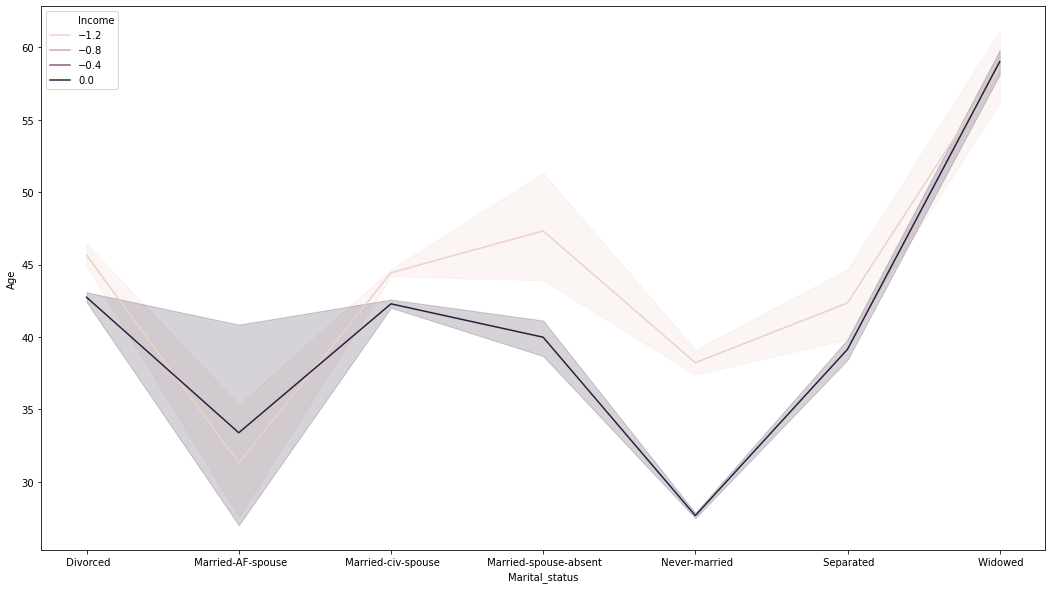

In [51]:
plt.figure(figsize=(18,10))
sns.lineplot(x='Marital_status',y="Age",hue="Income",data=df)
plt.show()

- those who are married are earing less than thoes who are sepeated or Widowed.
- Neveer married are in their 30s thats a start of there carrer as age inc there income does.
- There is a significant impact of marital status and age on Income earned.

<Figure size 1440x1080 with 0 Axes>

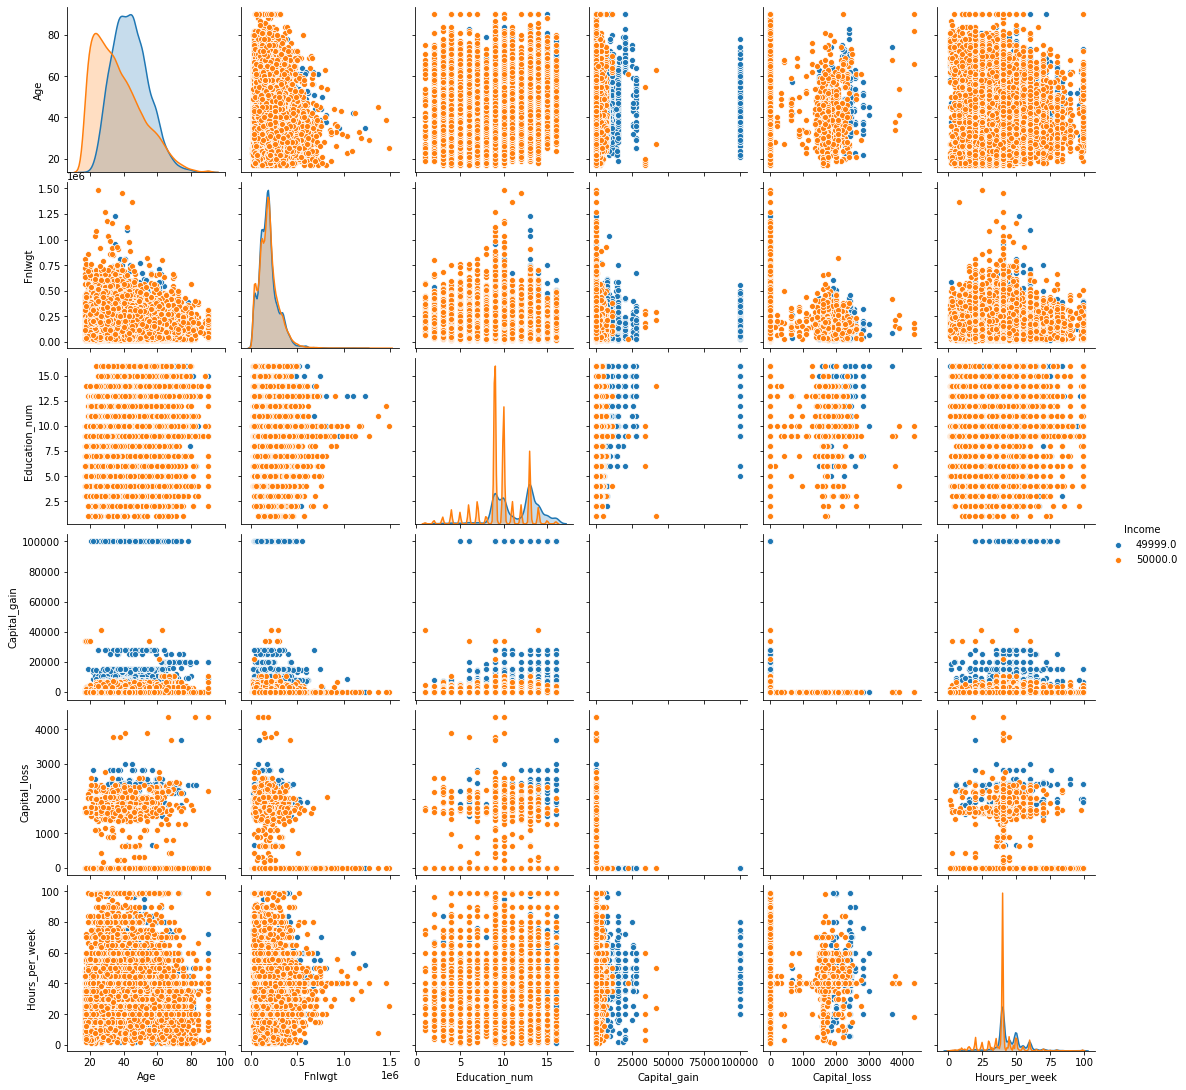

In [52]:
# taking INCOME as target variable I'm making a pair plot.

plt.figure(figsize=(20,15))
sns.pairplot(df , hue='Income')
plt.show()

In [53]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,50000.0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,50000.0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,50000.0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,50000.0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,50000.0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,49999.0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,50000.0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,50000.0


### Since the dataset has a lot of string values. We will use encoding

In [54]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [55]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [56]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,50000.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,50000.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,50000.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,50000.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,50000.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,49999.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,50000.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,50000.0


In [57]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,49999.759183
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49999.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,50000.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,50000.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,50000.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,50000.000000


### Checking Corelation

In [58]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,-0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,-0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,-0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,-0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,-0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,-0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,-0.215995


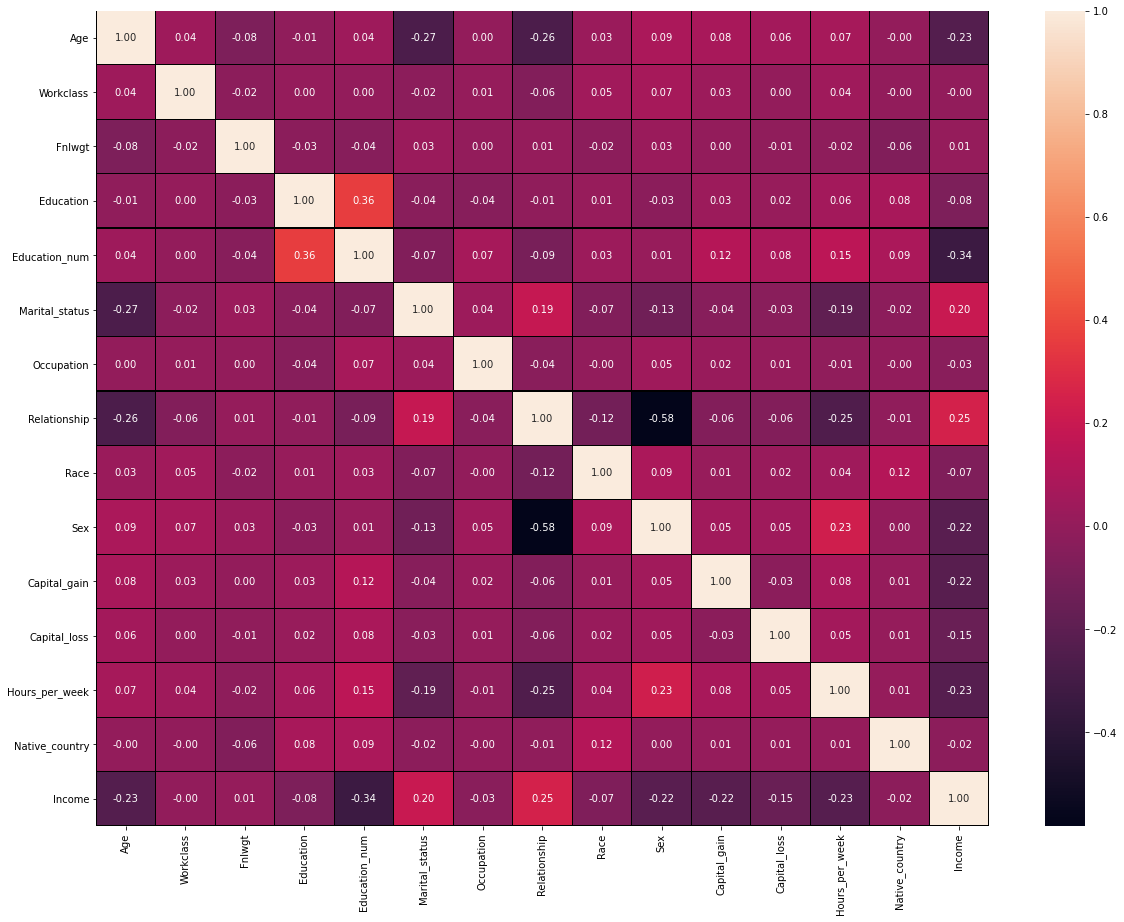

In [59]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, linewidths=0.1, linecolor="black", fmt="0.2f")
plt.show()

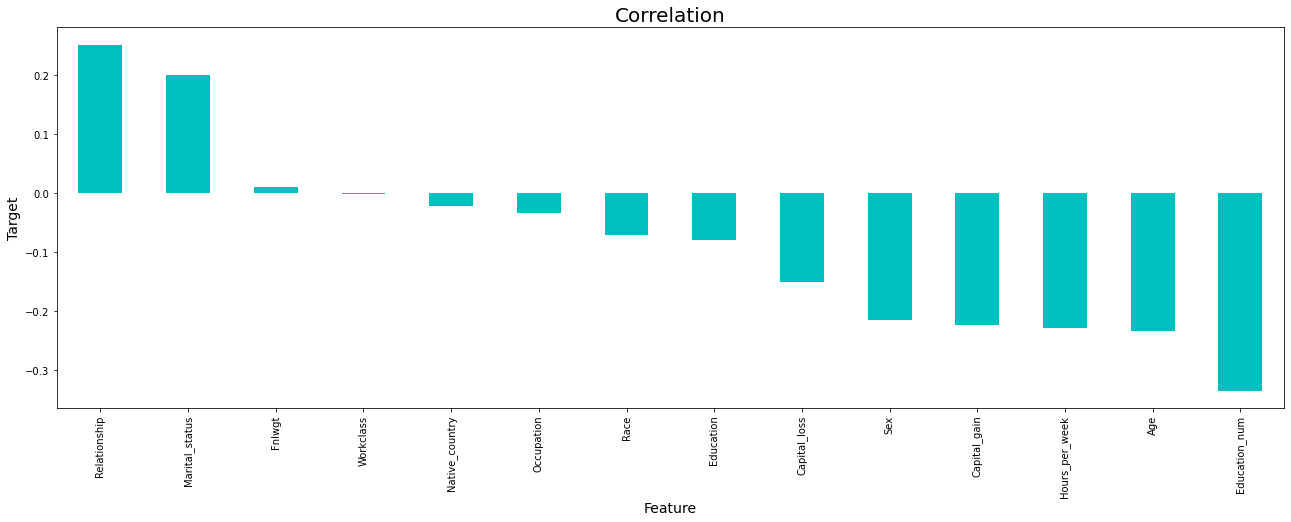

In [60]:
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Target",fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

- Relationship is highest positivly correlated with the income.
- Education_num is highly negativly coorelated with the Income, and so is age with the increase of age the Income inc
- Marital status is also very correlated with Income. the married person is earning more than the un married.

### Preprocessing Pipeline

## Making Data Set Ready For Machine Learning Models

In [61]:
features=df.drop('Income',axis=1)
target=df["Income"]

In [62]:
features.shape

(32560, 14)

In [63]:
target.head()

0    50000.0
1    50000.0
2    50000.0
3    50000.0
4    50000.0
Name: Income, dtype: float64

In [64]:
target.head()

0    50000.0
1    50000.0
2    50000.0
3    50000.0
4    50000.0
Name: Income, dtype: float64

### Checking outliers

In [65]:
from scipy.stats import zscore

Age
AxesSubplot(0.125,0.125;0.775x0.755)


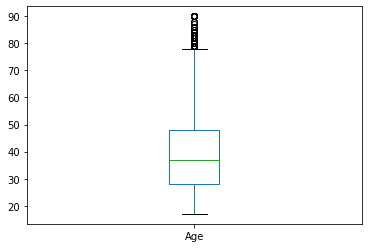

Workclass
AxesSubplot(0.125,0.125;0.775x0.755)


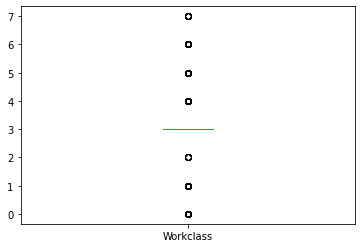

Fnlwgt
AxesSubplot(0.125,0.125;0.775x0.755)


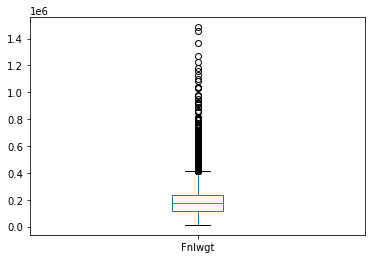

Education
AxesSubplot(0.125,0.125;0.775x0.755)


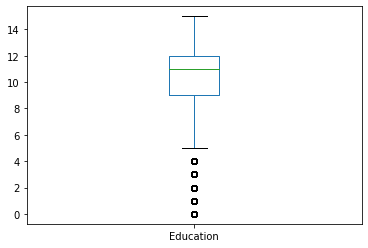

Education_num
AxesSubplot(0.125,0.125;0.775x0.755)


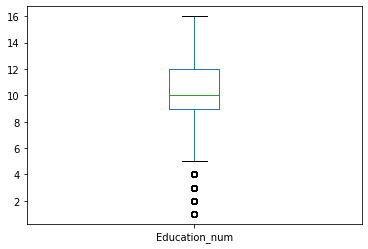

Marital_status
AxesSubplot(0.125,0.125;0.775x0.755)


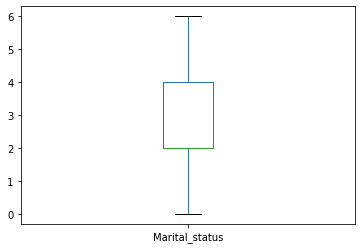

Occupation
AxesSubplot(0.125,0.125;0.775x0.755)


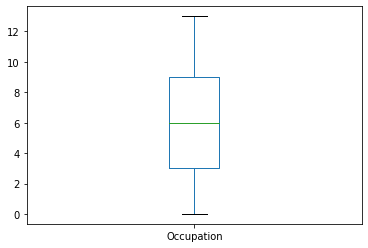

Relationship
AxesSubplot(0.125,0.125;0.775x0.755)


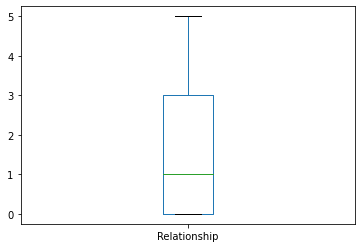

Race
AxesSubplot(0.125,0.125;0.775x0.755)


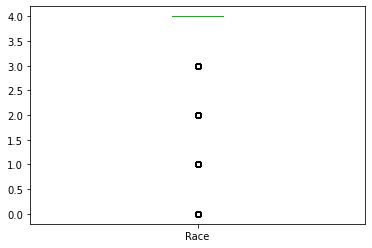

Sex
AxesSubplot(0.125,0.125;0.775x0.755)


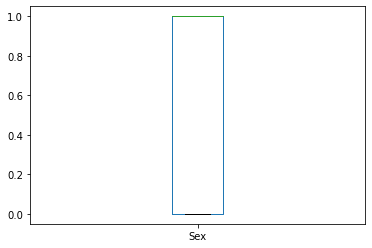

Capital_gain
AxesSubplot(0.125,0.125;0.775x0.755)


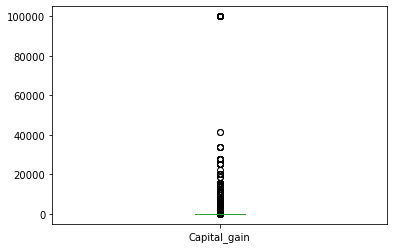

Capital_loss
AxesSubplot(0.125,0.125;0.775x0.755)


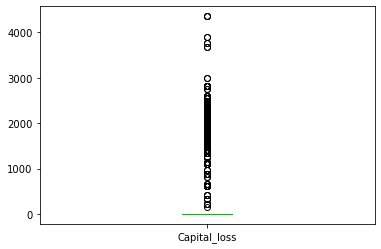

Hours_per_week
AxesSubplot(0.125,0.125;0.775x0.755)


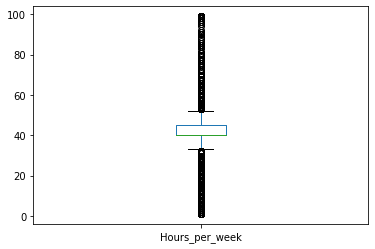

Native_country
AxesSubplot(0.125,0.125;0.775x0.755)


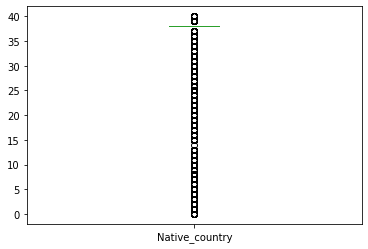

In [66]:
for i in features:
    print(i)
    print(features[i].plot.box())
    plt.show()

There are outliers in these columns that neends to be treated.
- Capital_gain
- Capital_loss
- Hours_per_week


In [67]:
from scipy.stats import zscore

In [68]:
z=np.abs(zscore(features))
z

array([[0.83709708, 1.72133587, 1.0087417 , ..., 0.21666301, 2.22212013,
        0.26137428],
       [0.04264043, 0.08522344, 0.24504633, ..., 0.21666301, 0.03542999,
        0.26137428],
       [1.05703146, 0.08522344, 0.42576955, ..., 0.21666301, 0.03542999,
        0.26137428],
       ...,
       [1.42358875, 0.08522344, 0.3588108 , ..., 0.21666301, 0.03542999,
        0.26137428],
       [1.21562378, 0.08522344, 0.11092744, ..., 0.21666301, 1.65520046,
        0.26137428],
       [0.98372   , 0.81805622, 0.92986178, ..., 0.21666301, 0.03542999,
        0.26137428]])

In [69]:
print(np.where(z<3))

(array([    0,     0,     0, ..., 32559, 32559, 32559], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))


In [70]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [71]:
df_new=features[(z<3).all(axis=1)]

In [72]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0


Age
AxesSubplot(0.125,0.125;0.775x0.755)


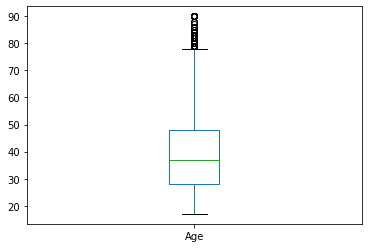

Workclass
AxesSubplot(0.125,0.125;0.775x0.755)


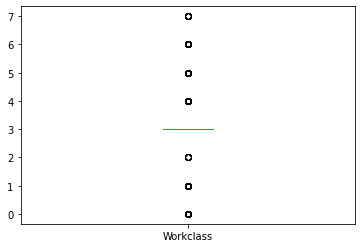

Fnlwgt
AxesSubplot(0.125,0.125;0.775x0.755)


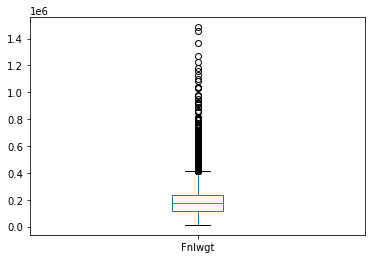

Education
AxesSubplot(0.125,0.125;0.775x0.755)


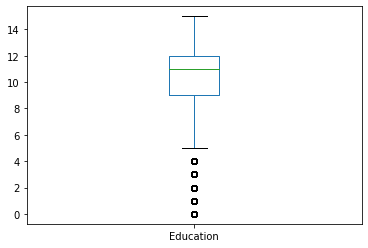

Education_num
AxesSubplot(0.125,0.125;0.775x0.755)


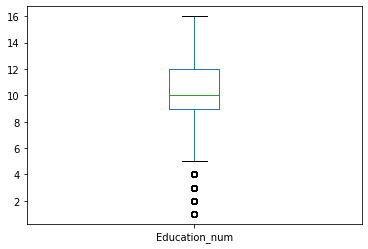

Marital_status
AxesSubplot(0.125,0.125;0.775x0.755)


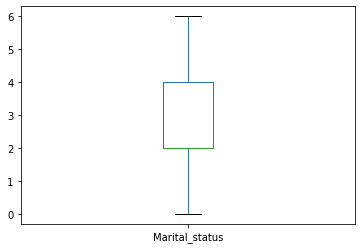

Occupation
AxesSubplot(0.125,0.125;0.775x0.755)


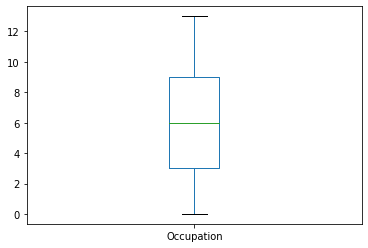

Relationship
AxesSubplot(0.125,0.125;0.775x0.755)


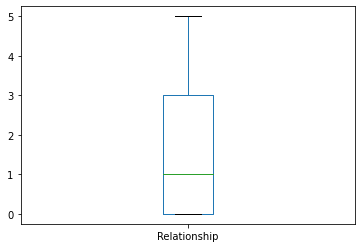

Race
AxesSubplot(0.125,0.125;0.775x0.755)


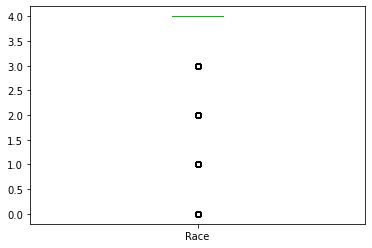

Sex
AxesSubplot(0.125,0.125;0.775x0.755)


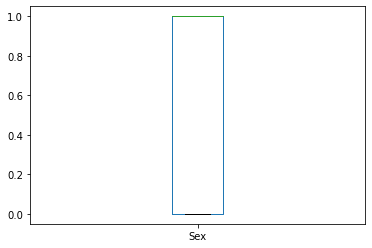

Capital_gain
AxesSubplot(0.125,0.125;0.775x0.755)


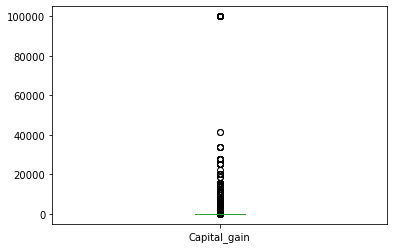

Capital_loss
AxesSubplot(0.125,0.125;0.775x0.755)


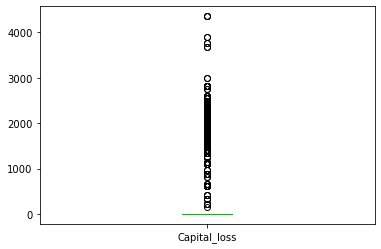

Hours_per_week
AxesSubplot(0.125,0.125;0.775x0.755)


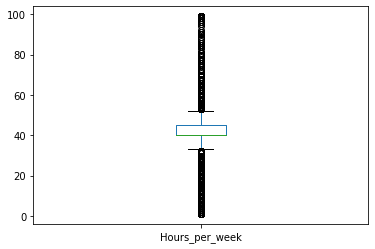

Native_country
AxesSubplot(0.125,0.125;0.775x0.755)


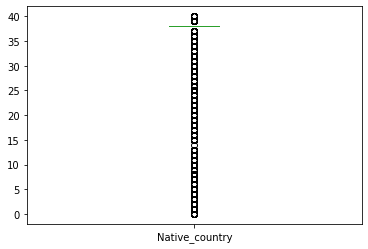

Income
AxesSubplot(0.125,0.125;0.775x0.755)


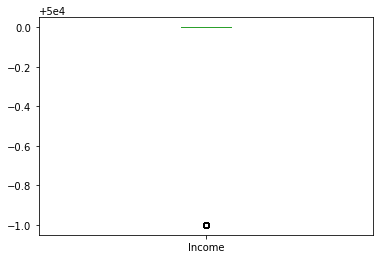

In [73]:
for i in df:
    print(i)
    print(df[i].plot.box())
    plt.show()

In [74]:
df.shape

(32560, 15)

### Checking skewness

In [75]:
from scipy.stats import skew

Age
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 79
Minimum : 17


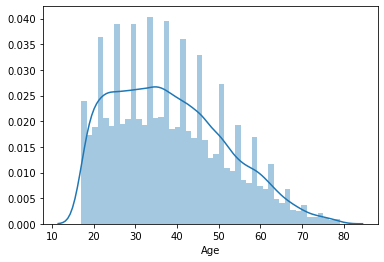

Workclass
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 6.0
Minimum : 0.0


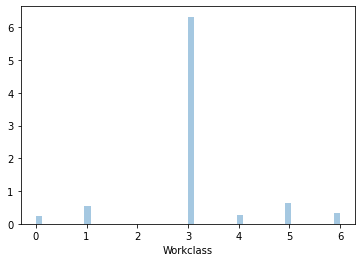

Fnlwgt
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 505980
Minimum : 18827


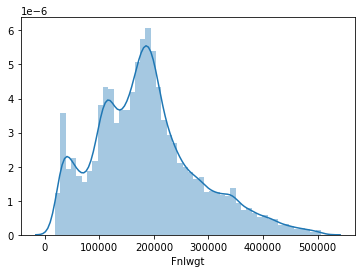

Education
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 15.0
Minimum : 0.0


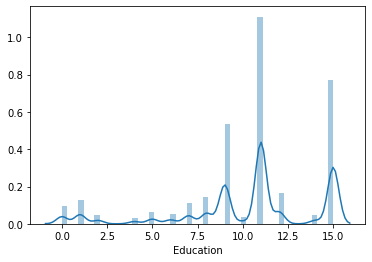

Education_num
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 16
Minimum : 3


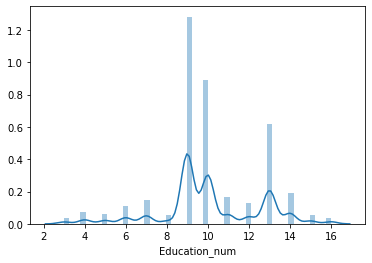

Marital_status
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 6.0
Minimum : 0.0


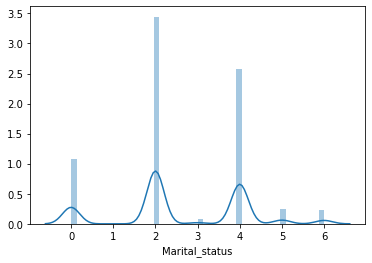

Occupation
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 13.0
Minimum : 0.0


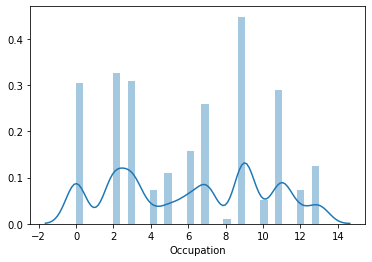

Relationship
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 5.0
Minimum : 0.0


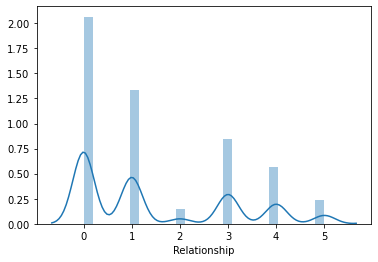

Race
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 4.0
Minimum : 2.0


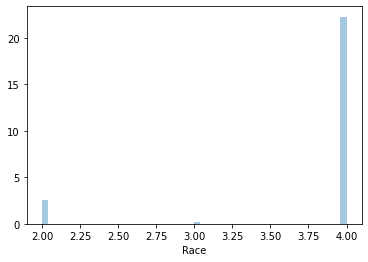

Sex
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 1.0
Minimum : 0.0


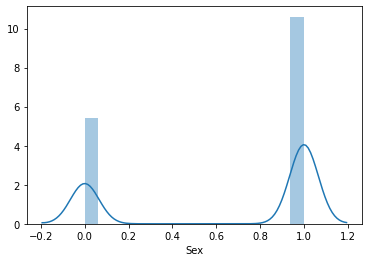

Capital_gain
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 22040
Minimum : 0


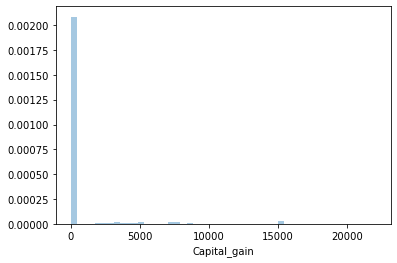

Capital_loss
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 1258
Minimum : 0


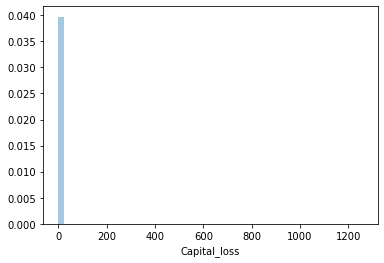

Hours_per_week
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 77
Minimum : 4


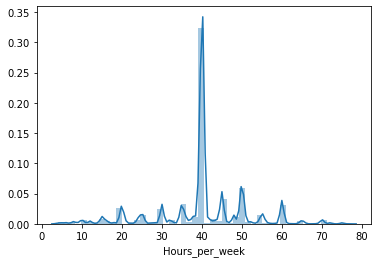

Native_country
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 40.0
Minimum : 19.0


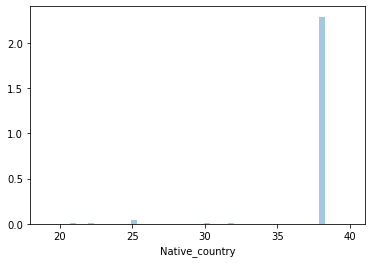

In [76]:
for i in df_new:
    print (i)
    print(sns.distplot(df_new[i]))
    print("Maximum :" , df_new[i].max())
    print("Minimum :" , df_new[i].min())
    plt.show()

In [77]:
df_new.skew()

Age                0.484817
Workclass          0.081968
Fnlwgt             0.627985
Education         -0.955755
Education_num     -0.146274
Marital_status    -0.045645
Occupation         0.013770
Relationship       0.753668
Race              -2.587044
Sex               -0.688946
Capital_gain       4.930671
Capital_loss      29.514547
Hours_per_week    -0.359841
Native_country    -5.405657
dtype: float64

keeping threshold value (+-05)
Skewness to be removed from these 
- Age(we wont be removing from age as it is very close to 0.5 and possibilitoes are that there could be citizen of older and new borns)
- Fnlwgt
- Capital gain
- Capital loss
-Income

We wont be removing skewness in these as they are string data types.
- Education
- Relationship
- Race
- Sex
- Native country

In [78]:
from sklearn.preprocessing import power_transform
df_new= power_transform(features)

df_new=pd.DataFrame(df_new,columns=features.columns)

In [79]:
df_new.skew()

Age              -0.013897
Workclass         0.216967
Fnlwgt            0.016914
Education        -0.309431
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.237163
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -2.981838
dtype: float64

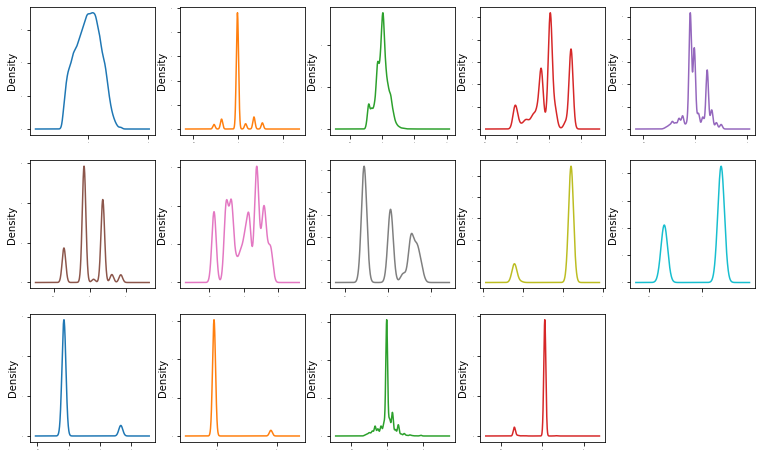

In [80]:
# checking data distribution among all columns.


df_new.plot(kind='density',subplots=True, layout=(3,5), sharex=False, legend=False, fontsize=1,figsize=(13,8))
plt.show()

The data looks a lot skewed to what it was before.

### Using Min-Max Scaler to scale the data:

In [81]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [82]:
scaler=MinMaxScaler()
scaler.fit_transform(features)

array([[0.45205479, 0.71428571, 0.0482376 , ..., 0.        , 0.12244898,
        0.95      ],
       [0.28767123, 0.42857143, 0.13811345, ..., 0.        , 0.39795918,
        0.95      ],
       [0.49315068, 0.42857143, 0.15106831, ..., 0.        , 0.39795918,
        0.95      ],
       ...,
       [0.56164384, 0.42857143, 0.09482688, ..., 0.        , 0.39795918,
        0.95      ],
       [0.06849315, 0.42857143, 0.12849934, ..., 0.        , 0.19387755,
        0.95      ],
       [0.47945205, 0.57142857, 0.18720338, ..., 0.        , 0.39795918,
        0.95      ]])

In [83]:
#Algorithms:-
   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [84]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
rf=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [85]:
#using logistic regression

# taking test size as 30%


maxAccu=0
maxRS= 0
for i in range (1,200):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.30,random_state=i)
    lr.fit(features_train,target_train)
    predrf=lr.predict(features_test)
    acc=accuracy_score(target_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
   
        
print('Best accuracy is',maxAccu,' on Random_state', maxRS)

Best accuracy is 0.8065110565110565  on Random_state 102


In [86]:
### Creating train-test split

features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.30,random_state=102)

### Logistic regression

In [87]:
lr.fit(features_train,target_train)
lr.score(features_train,target_train)
predlr=lr.predict(features_test)

print(accuracy_score(target_test,predlr))
print(confusion_matrix(target_test,predlr))
print(classification_report(target_test,predlr))

0.8065110565110565
[[ 625 1635]
 [ 255 7253]]
              precision    recall  f1-score   support

     49999.0       0.71      0.28      0.40      2260
     50000.0       0.82      0.97      0.88      7508

    accuracy                           0.81      9768
   macro avg       0.76      0.62      0.64      9768
weighted avg       0.79      0.81      0.77      9768



### GaussianNB

In [88]:
gnb.fit(features_train,target_train)
predgnb=gnb.predict(features_test)
print(accuracy_score(target_test,predgnb))

print(confusion_matrix(target_test,predgnb))

print(classification_report(target_test,predgnb))

0.8013923013923014
[[ 718 1542]
 [ 398 7110]]
              precision    recall  f1-score   support

     49999.0       0.64      0.32      0.43      2260
     50000.0       0.82      0.95      0.88      7508

    accuracy                           0.80      9768
   macro avg       0.73      0.63      0.65      9768
weighted avg       0.78      0.80      0.77      9768



The accuracy score is 79%

### SupportVectorClassifier

In [89]:
svc.fit(features_train,target_train)
svc.score(features_train,target_train)
predsvc=svc.predict(features_test)

print(accuracy_score(target_test,predsvc))
print(confusion_matrix(target_test,predsvc))
print(classification_report(target_test,predsvc))

0.8016994266994267
[[ 328 1932]
 [   5 7503]]
              precision    recall  f1-score   support

     49999.0       0.98      0.15      0.25      2260
     50000.0       0.80      1.00      0.89      7508

    accuracy                           0.80      9768
   macro avg       0.89      0.57      0.57      9768
weighted avg       0.84      0.80      0.74      9768



### DecissionTreeClassifier

In [90]:
dtc.fit(features_train,target_train)
dtc.score(features_train,target_train)
preddtc=dtc.predict(features_test)

print(accuracy_score(target_test,preddtc))
print(confusion_matrix(target_test,preddtc))
print(classification_report(target_test,preddtc))

0.8083538083538083
[[1416  844]
 [1028 6480]]
              precision    recall  f1-score   support

     49999.0       0.58      0.63      0.60      2260
     50000.0       0.88      0.86      0.87      7508

    accuracy                           0.81      9768
   macro avg       0.73      0.74      0.74      9768
weighted avg       0.81      0.81      0.81      9768



80% is the accuracy score

### KNeighboursClassifier()

In [91]:
knn.fit(features_train,target_train)
knn.score(features_train,target_train)
predknn=knn.predict(features_test)

print(accuracy_score(target_test,predknn))
print(confusion_matrix(target_test,predknn))
print(classification_report(target_test,predknn))

0.7807125307125307
[[ 734 1526]
 [ 616 6892]]
              precision    recall  f1-score   support

     49999.0       0.54      0.32      0.41      2260
     50000.0       0.82      0.92      0.87      7508

    accuracy                           0.78      9768
   macro avg       0.68      0.62      0.64      9768
weighted avg       0.76      0.78      0.76      9768



### RandomForestClassifier

In [92]:
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
predrf=rf.predict(features_test)

print(accuracy_score(target_test,predrf))
print(confusion_matrix(target_test,predrf))
print(classification_report(target_test,predrf))

0.8596437346437347
[[1459  801]
 [ 570 6938]]
              precision    recall  f1-score   support

     49999.0       0.72      0.65      0.68      2260
     50000.0       0.90      0.92      0.91      7508

    accuracy                           0.86      9768
   macro avg       0.81      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



### Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
lrscore=cross_val_score(lr,features,target,cv=7)
print('lrscore is...', lrscore)
print('lrscore.mean',lrscore.mean(),'lrscore.std',lrscore.std())

gnbscore=cross_val_score(gnb,features,target,cv=7)
print('gnbscore is...',gnbscore)
print('gnbscore.mean',gnbscore.mean(),'gnbscore.std',gnbscore.std())

rfscore=cross_val_score(rf,features,target,cv=7)
print('rfscore is...', rfscore)
print('rfscore.mean',rfscore.mean(),'rfscore.std',rfscore.std())

svcscore=cross_val_score(svc,features,target,cv=7)
print('svcscore is...',svcscore)
print('svcscore.mean',svcscore.mean(),'svcscore.std',svcscore.std())


dtcscore=cross_val_score(dtc,features,target,cv=7)
print('dtcscore is...',dtcscore)
print('dtcscore.mean',dtcscore.mean(),'dtcscore.std',dtcscore.std())



knnscore=cross_val_score(knn,features,target,cv=7)
print('knnscore is...',knnscore)
print('knnscore.mean=',knnscore.mean(),'knnscore.std',knnscore.std())

lrscore is... [0.79127257 0.78546862 0.788908   0.78886261 0.78972264 0.79488282
 0.79058267]
lrscore.mean 0.7899571321318566 lrscore.std 0.002642631739076099
gnbscore is... [0.79256234 0.79363715 0.79578676 0.79531284 0.79165771 0.79853795
 0.80154805]
gnbscore.mean 0.7955775413507854 gnbscore.std 0.0032237190875277367
rfscore is... [0.85339639 0.85425623 0.85361135 0.85529994 0.85680499 0.86841539
 0.857235  ]
rfscore.mean 0.8570027562744577 rfscore.std 0.0048593337454136435
svcscore is... [0.79514187 0.7966466  0.79234738 0.79660288 0.79638787 0.79810793
 0.79445281]
svcscore.mean 0.7956696214069003 svcscore.std 0.001735477825646567
dtcscore is... [0.80975924 0.80846948 0.79965606 0.81831864 0.81014836 0.82089873
 0.81788863]
dtcscore.mean 0.8121627335202647 dtcscore.std 0.006833637175371538
knnscore is... [0.77300086 0.77858985 0.77794497 0.77402709 0.77402709 0.76994195
 0.77682219]
knnscore.mean= 0.7749077146025869 knnscore.std 0.0028358473103894857


The minimum diffrence in accuracy and cross validation score is for RandomForestClassifier(0),
- so this is our best fit model

### Hyper parameter tunning

In [95]:
# Selecting RandomForestClassifier

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameters = {'max_depth':np.arange(2,15),
             'criterion':['gini','entropy']}

In [98]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [99]:
GCV.fit(features_train,target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [100]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 14}

In [101]:
GCV_pred=GCV.best_estimator_.predict(features_test)

In [102]:
accuracy_score(target_test,GCV_pred)

0.8724406224406225

In [103]:
#the score increased with 1%

#### Concluding Remarks

The RandomForestClassifier gave the best results with the accuracy scrore of 86% with the help of Hyper Parameter Tunning the result increased by 1%